In [1]:
# HW5

import pandas as pd

data = pd.read_csv('./data/wisc_bc_data.csv',sep=',')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [2]:
from scipy import stats
data = data.iloc[:,1:]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
columns = data.columns[1:]
t_results = []
for column in columns:
    data_B = data[data['diagnosis']=='B'][column]
    data_M = data[data['diagnosis']=='M'][column]
    t_results.append((column, stats.ttest_ind(data_B, data_M)))
    

In [4]:
t_results.sort(key=lambda x : x[1][1])

In [5]:
t_results[:5] # 평균차이가 가장 크게 나는 변수들로, 암진단에 가장 중요한 변수 5가지이다.

[('points_worst',
  Ttest_indResult(statistic=-31.054555115984236, pvalue=1.9690997072164375e-124)),
 ('perimeter_worst',
  Ttest_indResult(statistic=-29.96571739271028, pvalue=5.771397139670263e-119)),
 ('points_mean',
  Ttest_indResult(statistic=-29.354318592113618, pvalue=7.101150161057422e-116)),
 ('radius_worst',
  Ttest_indResult(statistic=-29.33908156342075, pvalue=8.482291921684414e-116)),
 ('perimeter_mean',
  Ttest_indResult(statistic=-26.405212979192665, pvalue=8.43625103617473e-101))]

In [6]:
# HW6

import pandas as pd
data =pd.read_csv('./data/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [7]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [8]:
model = ols("VIQ ~ Gender + Weight + Height + MRI_Count", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Sun, 18 Oct 2020   Prob (F-statistic):             0.0455
Time:                        16:04:30   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        169.7719     90.054      1.

In [9]:
from sklearn.preprocessing import LabelEncoder 

In [10]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,0,133,132,124,118.0,64.5,816932
1,2,1,140,150,124,NaN,72.5,1001121
2,3,1,139,123,150,143.0,73.3,1038437
3,4,1,133,129,128,172.0,68.8,965353
4,5,0,137,132,134,147.0,65.0,951545


In [11]:
model = ols("VIQ ~ Gender + Weight + Height + MRI_Count", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Sun, 18 Oct 2020   Prob (F-statistic):             0.0455
Time:                        16:04:31   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    169.7719     90.054      1.885      0.0

$P>|t| = 0.358$ 이므로$H_0 : 남녀 평균 차이는 없다$라는 귀무가설은 기각되기 어려우므로 성별에 따른 VIQ차이는 없다고 할 수 있다.

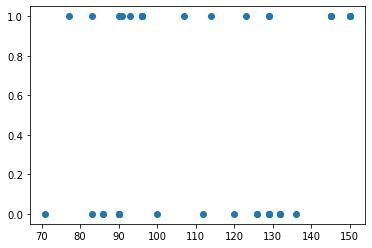

In [12]:
plt.scatter(data['VIQ'], data['Gender'])
plt.show()